In [115]:
'''
This code reads all the moments from FLASK simulations;
it performs the noise subtraction (FLASK moments haven0t been de-noised)
and if needed add the 'modelling uncertainties'. Then it saves a list of corrected
FLASK moments objects - this is what is needed to run the analysis.

'''

'''
de-noise.
Based on FLASK:
only auto-moments for <dd> ans <ddd>.
<dd> : <nn> needs to be subtracted, <nd>  2order smaller
<ddd> : <nnn> needs to be subtracted, <ndd>, <nnd>  2order smaller

<dK> : need to subtract <dKN> , others zero.
<dKK>: need to subtract everything, dkNkN dominant
<KKd>: need to subtract everything
'''

import copy
import os
import pickle
from Moments_analysis import moments_map, ∑

def save_obj(name, obj):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
        
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)#, encoding='latin1')
    
output_FLASK = '/global/cscratch1/sd/mgatti/Mass_Mapping/moments/flask/'
N_rel = 500
mapp = []
bins_lenses = [0, 1, 2, 3]
bins_WL = [0, 1, 2, 3]
# dict_keys(['kEkE', 'kBkB', 'kEkN', 'kNkN', 'kNkE', 'dKK', 'Kdd', 'dkNkN', 'nKK', 'nkNkN', 'kNdd', 'knn', 'kNnn', 'dd', 'nn', 'dnn', 'ndd'])
 
for i in range(N_rel):
    try:
        mute = load_obj(output_FLASK+'moments_seed_'+str(i+1))
        mapp.append(copy.deepcopy(mute))
        if i == 0 :
            mapp_ave = copy.copy(mute)
            for key in mapp_ave.moments.keys():
                for key2 in mapp_ave.moments[key].keys():
                    mapp_ave.moments[key][key2] = mapp_ave.moments[key][key2]/N_rel
        else:
            for key in mapp_ave.moments.keys():
                for key2 in mapp_ave.moments[key].keys():
                    mapp_ave.moments[key][key2] += mute.moments[key][key2]/N_rel
         


        for b1 in bins_WL:
            # noise subtraction
            binx = '{0}_{0}'.format(b1)

            mapp[i].moments['kEkE'][binx] -= mapp[i-1].moments['kNkN'][binx]
            mapp[i].moments['kBkB'][binx] -= mapp[i-1].moments['kNkN'][binx]

        for b1 in bins_lenses:
            for b2 in bins_WL:
                binx = '{0}_{1}'.format(b1,b2)
                mapp[i].moments['dKK'][binx] -= mapp[i-1].moments['dkNkN'][binx]
                binx = '{0}_{1}'.format(b2,b1)
                mapp[i].moments['Kdd'][binx] -= mapp[i-1].moments['kNdd'][binx]


        for b1 in bins_lenses:
            for b2 in bins_WL:
                for b3 in bins_WL:
                    try:
                        binx = '{0}_{1}_{2}'.format(b1, b2, b3)
                        mapp[i].moments['dKK'][binx] -= (mapp[i-1].moments['nkNkN'][binx]+3*mapp[i-1].moments['nKK'][binx]+3*mapp[i-1].moments['dkNkN'][binx])
                    except:
                        pass
        for b1 in bins_WL:
            for b2 in bins_lenses:
                for b3 in bins_lenses:
                    try:
                        binx = '{0}_{1}_{2}'.format(b1, b2, b3)
                        mapp[i].moments['Kdd'][binx] -= (mapp[i-1].moments['kNnn'][binx]+3*mapp[i-1].moments['kNdd'][binx]+3*mapp[i-1].moments['knn'][binx])
                    except:
                        pass

    except:
        print ('failed ',i)
        mapp.append(mapp[i-1])
        for key in mapp_ave.moments.keys():
            for key2 in mapp_ave.moments[key].keys():
                mapp_ave.moments[key][key2] += mapp[i-1].moments[key][key2]/N_rel
save_obj('/global/project/projectdirs/des/mgatti/Moments_analysis/Cov_FLASK_Y3',mapp)
print ('done')

failed  134
failed  148
failed  150
failed  160
failed  161
failed  201
done


array([[ 1.        ,  0.92522275,  0.69075623, ..., -0.06902691,
        -0.0308859 , -0.02788409],
       [ 0.92522275,  1.        ,  0.88507852, ..., -0.08195102,
        -0.03407335, -0.04741721],
       [ 0.69075623,  0.88507852,  1.        , ..., -0.07882119,
        -0.02915659, -0.05186828],
       ...,
       [-0.06902691, -0.08195102, -0.07882119, ...,  1.        ,
         0.81487883,  0.56695496],
       [-0.0308859 , -0.03407335, -0.02915659, ...,  0.81487883,
         1.        ,  0.82041583],
       [-0.02788409, -0.04741721, -0.05186828, ...,  0.56695496,
         0.82041583,  1.        ]])

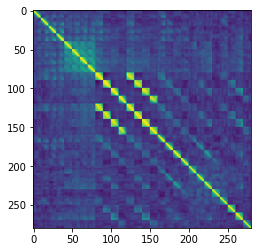

In [124]:
path_cov = "/global/project/projectdirs/des/mgatti/Moments_analysis/Cov_FLASK_Y3"
map_flask_reals = load_obj(path_cov)

bins_dictionary = dict()
bins_dictionary['auto'] = dict()
bins_dictionary['auto']['kEkE'] = {'bins':[[1,1],[2,2],[3,3],[4,4],[1,1,1],[2,2,2],[3,3,3],[4,4,4]], 'scale_cut': None, 'Nz_mean': None}
bins_dictionary['auto']['dd'] = {'bins':[[1,1],[2,2],[3,3],[4,4],[1,1,1],[2,2,2],[3,3,3],[4,4,4]], 'scale_cut': None, 'Nz_mean': None}
bins_dictionary['auto']['Kdd'] = {'bins':[[1,1],[2,2],[3,3],[4,4], [1,1,1],[2,2,2],[3,3,3],[4,4,4]],'scale_cut': None, 'Nz_mean': None}
bins_dictionary['auto']['dKK'] = {'bins':[[1,1,1],[2,2,2],[3,3,3],[4,4,4]],'scale_cut': None, 'Nz_mean': None}


import numpy as np
smoothing_scales = np.array([3.2,5.1,8.2,13.1,21.0,33.6,54.,86.,138,221.])

numb_of_real = 500
cov2a,v2,err2 = make_covariance(map_flask_reals, numb_of_real, smoothing_scales, bins_dictionary['auto'])

%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(cov2a['corr'])
cov2a['corr']

In [125]:
err2.keys()

dict_keys(['kEkE_0_0', 'kEkE_1_1', 'kEkE_2_2', 'kEkE_3_3', 'kEkE_0_0_0', 'kEkE_1_1_1', 'kEkE_2_2_2', 'kEkE_3_3_3', 'dd_0_0', 'dd_1_1', 'dd_2_2', 'dd_3_3', 'dd_0_0_0', 'dd_1_1_1', 'dd_2_2_2', 'dd_3_3_3', 'Kdd_0_0', 'Kdd_1_1', 'Kdd_2_2', 'Kdd_3_3', 'Kdd_0_0_0', 'Kdd_1_1_1', 'Kdd_2_2_2', 'Kdd_3_3_3', 'dKK_0_0_0', 'dKK_1_1_1', 'dKK_2_2_2', 'dKK_3_3_3'])

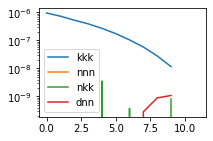

In [95]:
'''
<dK> : neglgible <dKN> , others zero.
<dKK>: need to subtract everything, dkNkN dominant

'''

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
binx = '3_1'

fig, ax = plt.subplots(1,1, figsize=(3,2), sharey = 'row')

ax.plot(mapp_ave.moments['dKK'][binx], label = 'kkk')
ax.plot(mapp_ave.moments['nkNkN'][binx], label = 'nnn')
ax.plot(mapp_ave.moments['nKK'][binx], label = 'nkk')
ax.plot(mapp_ave.moments['dkNkN'][binx], label = 'dnn')
ax.plot(np.arange(12),np.zeros(12),color='black')
ax.set_yscale('log')
plt.legend()

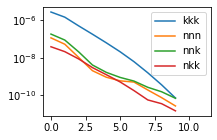

In [99]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
binx = '3_3_3'

fig, ax = plt.subplots(1,1, figsize=(3,2), sharey = 'row')

ax.plot(mapp_ave.moments['Kdd'][binx], label = 'kkk')
ax.plot(mapp_ave.moments['kNnn'][binx], label = 'nnn')
ax.plot(mapp_ave.moments['knn'][binx], label = 'nnk')
ax.plot(mapp_ave.moments['kNdd'][binx], label = 'nkk')
ax.plot(np.arange(12),np.zeros(12),color='black')
ax.set_yscale('log')
plt.legend()

'\nde-noise.\nBased on FLASK:\n<dd> : <nn> needs to be subtracted, <nd>  2order smaller\n<ddd> : <nnn> needs to be subtracted, <ndd>, <nnd>  2order smaller\n\n'

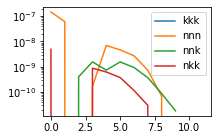

In [74]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
binx = '3_1_3'
fig, ax = plt.subplots(1,1, figsize=(3,2), sharey = 'row')


ax.plot(mapp_ave.moments['dd'][binx], label = 'kkk')
ax.plot(mapp_ave.moments['nn'][binx], label = 'nnn')
ax.plot(-mapp_ave.moments['dnn'][binx], label = 'nnk')
ax.plot(mapp_ave.moments['ndd'][binx], label = 'nkk')
ax.plot(np.arange(12),np.zeros(12),color='black')
ax.set_yscale('log')
plt.legend()

'''
de-noise.
Based on FLASK:
only auto-moments for <dd> ans <ddd>.
<dd> : <nn> needs to be subtracted, <nd>  2order smaller
<ddd> : <nnn> needs to be subtracted, <ndd>, <nnd>  2order smaller

'''

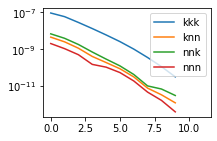

In [58]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
binx = '3_3_3'
fig, ax = plt.subplots(1,1, figsize=(3,2), sharey = 'row')

ax.plot(mapp_ave.moments['kEkE'][binx], label = 'kkk')
ax.plot(mapp_ave.moments['kEkN'][binx], label = 'knn')
ax.plot(mapp_ave.moments['kNkE'][binx], label = 'nnk')
ax.plot(mapp_ave.moments['kNkN'][binx], label = 'nnn')
ax.plot(np.arange(12),np.zeros(12),color='black')
ax.set_yscale('log')
plt.legend()